In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import pprint

In [2]:
airfoil = pd.read_csv('NACA63A418.csv')

scaleFactor = 10.14

airfoil_x = (airfoil.transpose().iloc[0])*scaleFactor
airfoil_y1 = (airfoil.transpose().iloc[1])*scaleFactor
airfoil_y2 = (airfoil.transpose().iloc[2])*scaleFactor
airfoil_y3 = (airfoil.transpose().iloc[3])*scaleFactor

airfoilNPx = airfoil_x.to_numpy()
airfoilNPy1 = airfoil_y1.to_numpy()
airfoilNPy2 = airfoil_y2.to_numpy()
airfoilNPy3 = airfoil_y3.to_numpy()

In [3]:
intervals = 200

dxList = np.linspace(0, 371.22648, intervals)
dyList = np.linspace(0, -74.04244, intervals)
thetaList = np.linspace(0, 35, intervals)

chordLength = 1014.28

quarterChord = chordLength/4
quarterChordRemainder = chordLength - quarterChord

def QCx(dx, theta):
    return dx + quarterChord * math.cos(math.radians(theta))

def QCy(dy, theta):
    return dy

def LEx(QCx, theta):
    return QCx - quarterChord * math.cos(math.radians(theta))

def LEy(QCy, theta):
    return QCy + quarterChord * math.sin(math.radians(theta))

def TEx(QCx, theta):
    return QCx + quarterChordRemainder * math.cos(math.radians(theta))

def TEy(QCy, theta):
    return QCy - quarterChordRemainder * math.sin(math.radians(theta))

In [4]:
def animate():
    fig, ax = plt.subplots(dpi=260)

    for i in range(0, intervals):
        ax.cla()
        dx = dxList[i]
        dy = dyList[i]
        theta = thetaList[i]

        qcx = QCx(dx, theta)
        qcy = QCy(dy, theta)

        lex = LEx(qcx, theta)
        tex = TEx(qcx, theta)

        ley = LEy(qcy, theta)
        tey = TEy(qcy, theta)

        ax.set(xlim = (-10, 1550), ylim=(-600, 300))

        ax.plot([lex, tex], [ley, tey], marker='o')
        ax.plot([qcx], [qcy], marker='o')

        ax.text(qcx, qcy, 'QC: {0} | {1}'.format(int(dx + quarterChord), int(dy)))
        ax.text(lex, ley, 'LE: {0} | {1}'.format(int(lex), int(ley)))
        ax.text(tex, tey, 'TE: {0} | {1}'.format(int(tex), int(tey)))
        ax.text(10, 250, r'$\theta$: {0}'.format(theta))

        plt.pause(0.001)

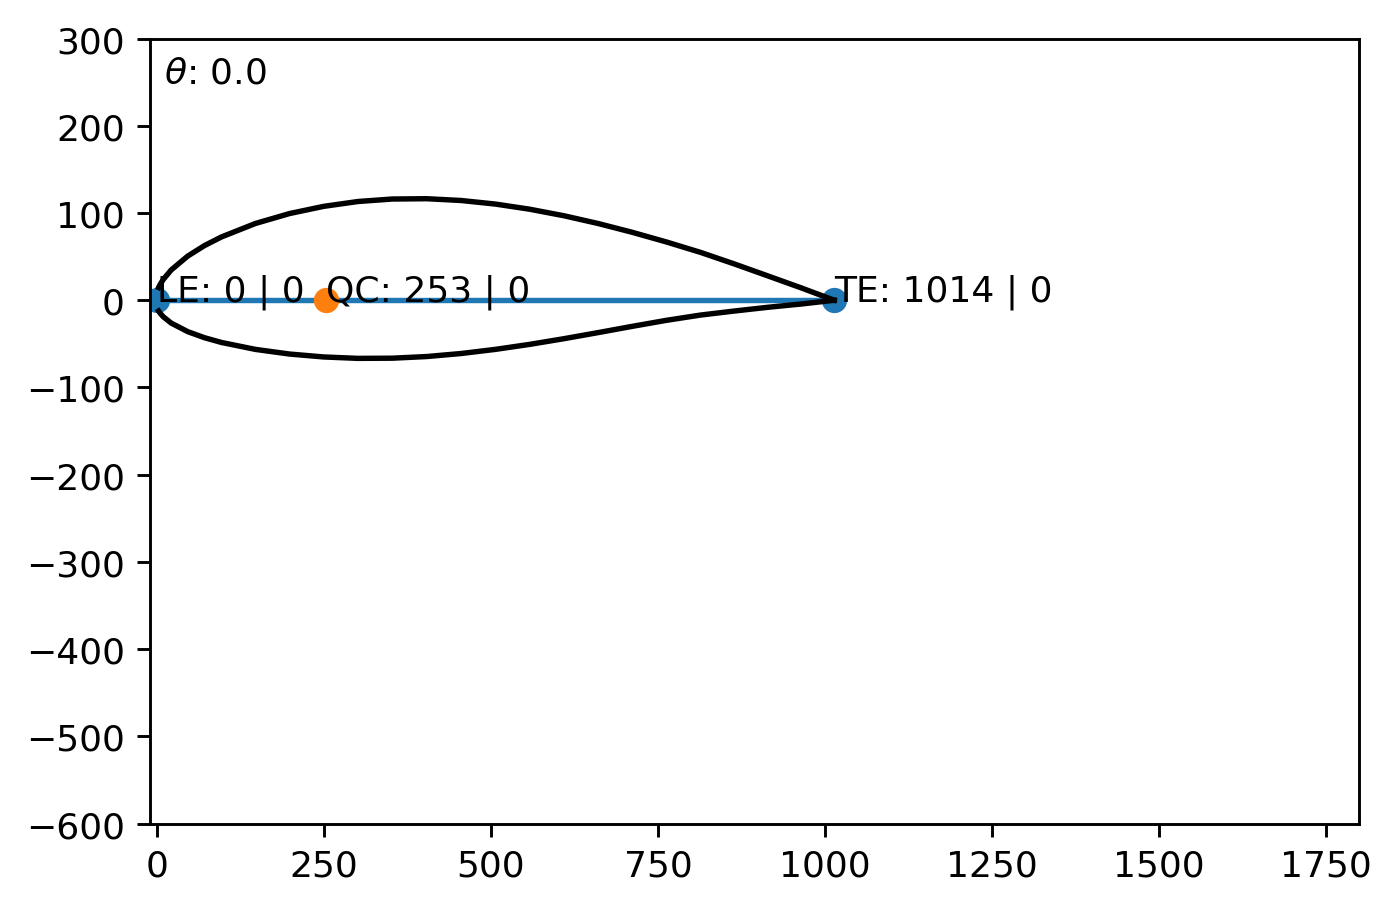

In [5]:
def stowed():
    fig, ax = plt.subplots(dpi=260)

    interval = 0

    dx = dxList[interval]
    dy = dyList[interval]
    theta = thetaList[interval]

    qcx = QCx(dx, theta)
    qcy = QCy(dy, theta)

    lex = LEx(qcx, theta)
    tex = TEx(qcx, theta)

    ley = LEy(qcy, theta)
    tey = TEy(qcy, theta)

    ax.set(xlim = (-10, 1800), ylim=(-600, 300))

    ax.plot([lex, tex], [ley, tey], marker='o')
    ax.plot([qcx], [qcy], marker='o')
    
    # https://www.science-emergence.com/Articles/How-to-create-and-apply-a-rotation-matrix-using-python-/
    radTheta = np.radians(theta)
    r = np.array([ [np.cos(radTheta), -np.sin(radTheta)], [np.sin(radTheta),  np.cos(radTheta)] ])
    
    xPrime = []
    y1Prime = []
    y3Prime = []
    
    for i in range(0, len(airfoilNPx)):
        airfoilPrime1 = r.dot(np.array([airfoilNPx[i], airfoilNPy1[i]]))
        airfoilPrime3 = r.dot(np.array([airfoilNPx[i], airfoilNPy3[i]]))
        
        xPrime.append(airfoilPrime1[0] + dx)
        y1Prime.append(airfoilPrime1[1] - dy)
        y3Prime.append(airfoilPrime3[1] - dy)

    plt.plot(xPrime, y1Prime, color='black')
    plt.plot(xPrime, y3Prime, color='black')

    ax.text(qcx, qcy, 'QC: {0} | {1}'.format(int(dx + quarterChord), int(dy)))
    ax.text(lex, ley, 'LE: {0} | {1}'.format(int(lex), int(ley)))
    ax.text(tex, tey, 'TE: {0} | {1}'.format(int(tex), int(tey)))
    ax.text(10, 250, r'$\theta$: {0}'.format(theta))

    plt.show()
    
stowed()

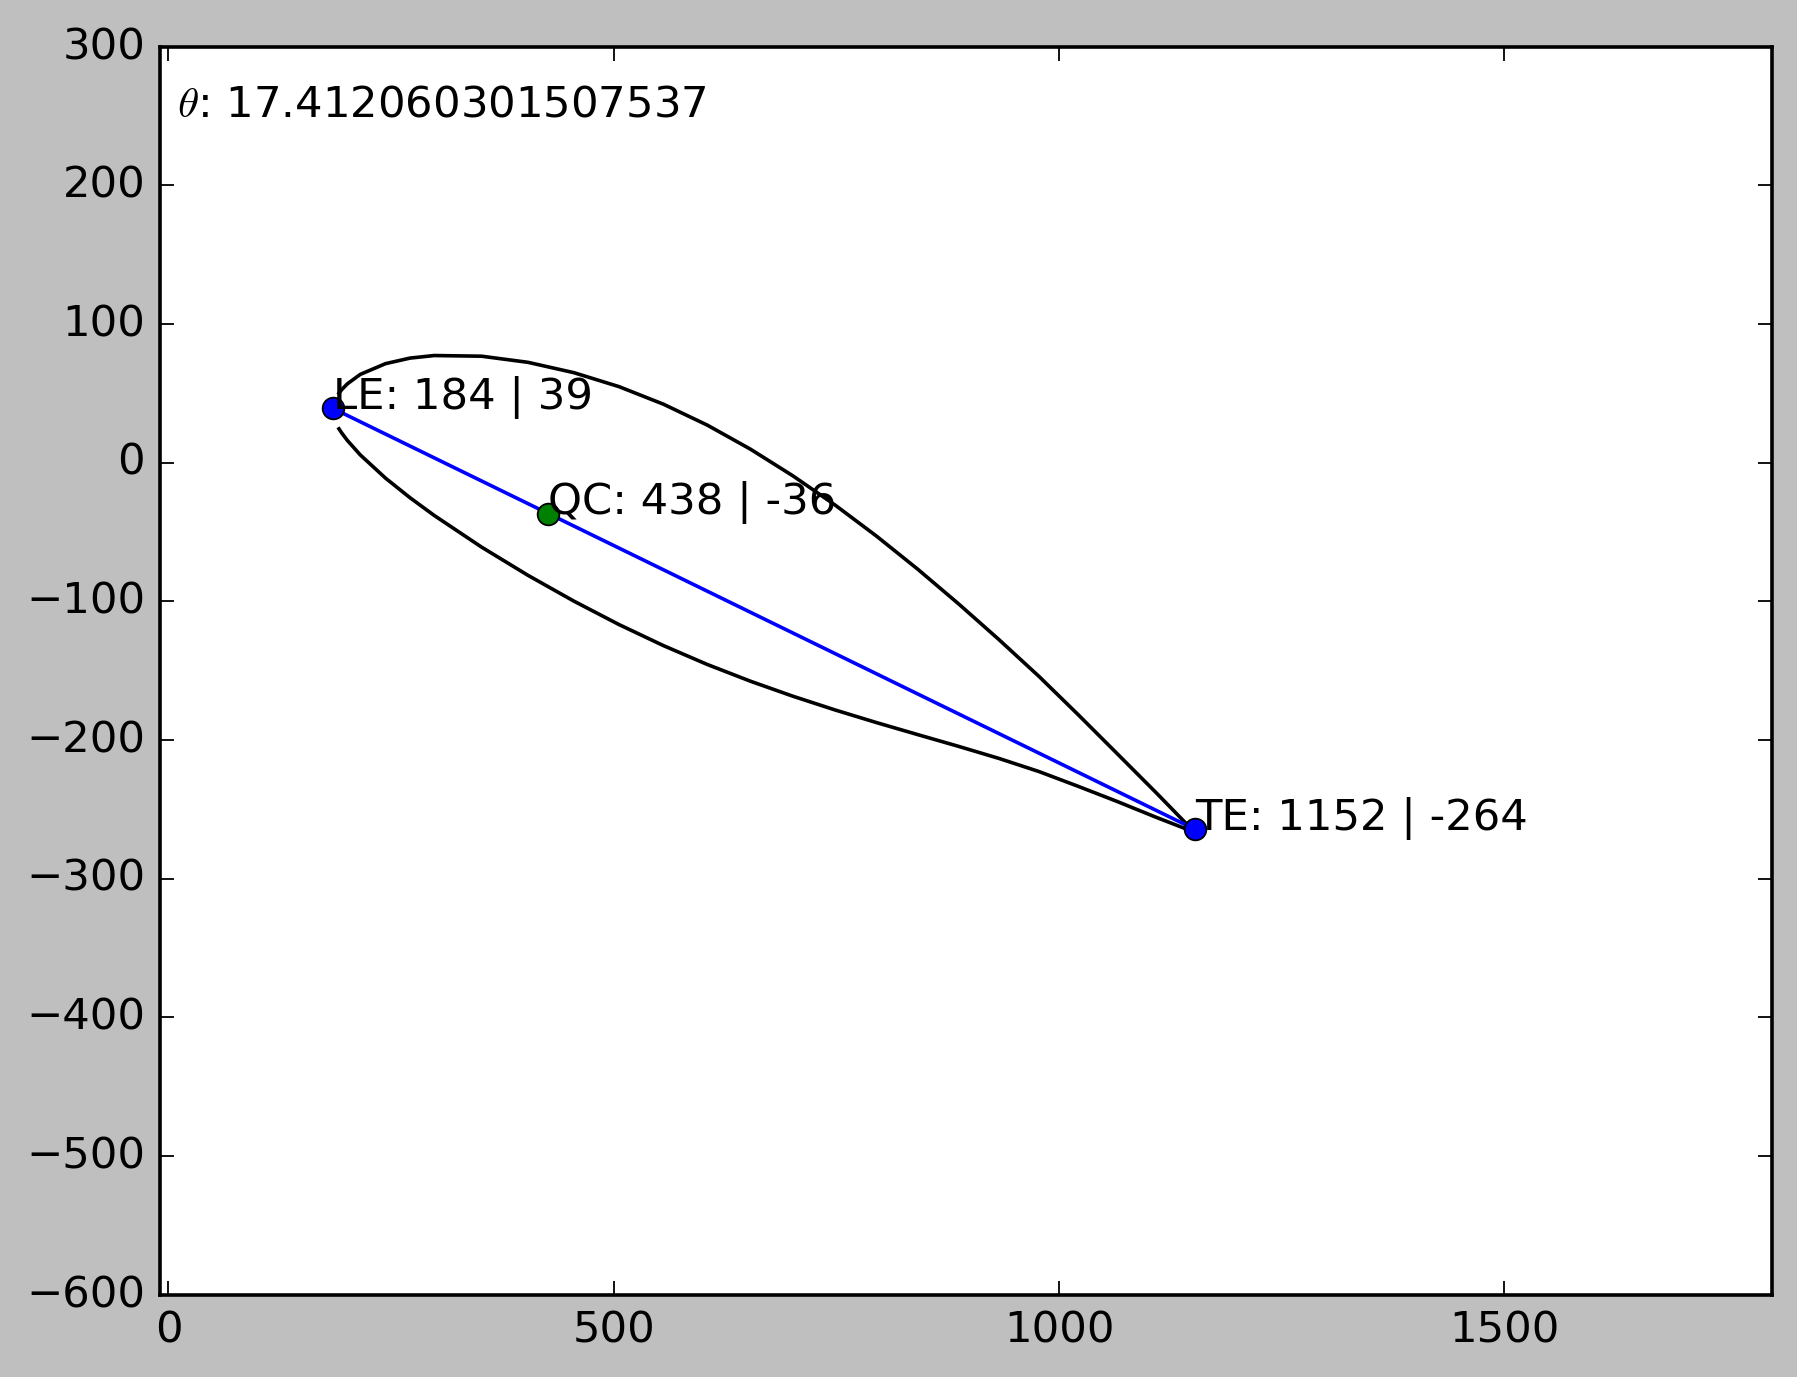

In [8]:
def halfDeployment():
    plt.style.use('classic')
    fig, ax = plt.subplots(dpi=260)

    interval = int(intervals/2 - 1)

    dx = dxList[interval]
    dy = dyList[interval]
    theta = thetaList[interval]

    qcx = QCx(dx, theta)
    qcy = QCy(dy, theta)

    lex = LEx(qcx, theta)
    tex = TEx(qcx, theta)

    ley = LEy(qcy, theta)
    tey = TEy(qcy, theta)

    ax.set(xlim = (-10, 1800), ylim=(-600, 300))
    
    # https://www.science-emergence.com/Articles/How-to-create-and-apply-a-rotation-matrix-using-python-/
    radTheta = np.radians(-theta)
    r = np.array([ [np.cos(radTheta), -np.sin(radTheta)], [np.sin(radTheta),  np.cos(radTheta)] ])
    
    xPrime = []
    y1Prime = []
    y3Prime = []
    
    for i in range(0, len(airfoilNPx)):
        airfoilPrime1 = r.dot(np.array([airfoilNPx[i], airfoilNPy1[i]]))
        airfoilPrime3 = r.dot(np.array([airfoilNPx[i], airfoilNPy3[i]]))
        
        xPrime.append(airfoilPrime1[0] + dx)
        y1Prime.append(airfoilPrime1[1] - dy)
        y3Prime.append(airfoilPrime3[1] - dy)

    plt.plot(xPrime, y1Prime, color='black')
    plt.plot(xPrime, y3Prime, color='black')

    ax.plot([lex, tex], [ley, tey], marker='o')
    ax.plot([qcx], [qcy], marker='o')

    ax.text(qcx, qcy, 'QC: {0} | {1}'.format(int(dx + quarterChord), int(dy)))
    ax.text(lex, ley, 'LE: {0} | {1}'.format(int(lex), int(ley)))
    ax.text(tex, tey, 'TE: {0} | {1}'.format(int(tex), int(tey)))
    ax.text(10, 250, r'$\theta$: {0}'.format(theta))
    

    plt.show()

halfDeployment()

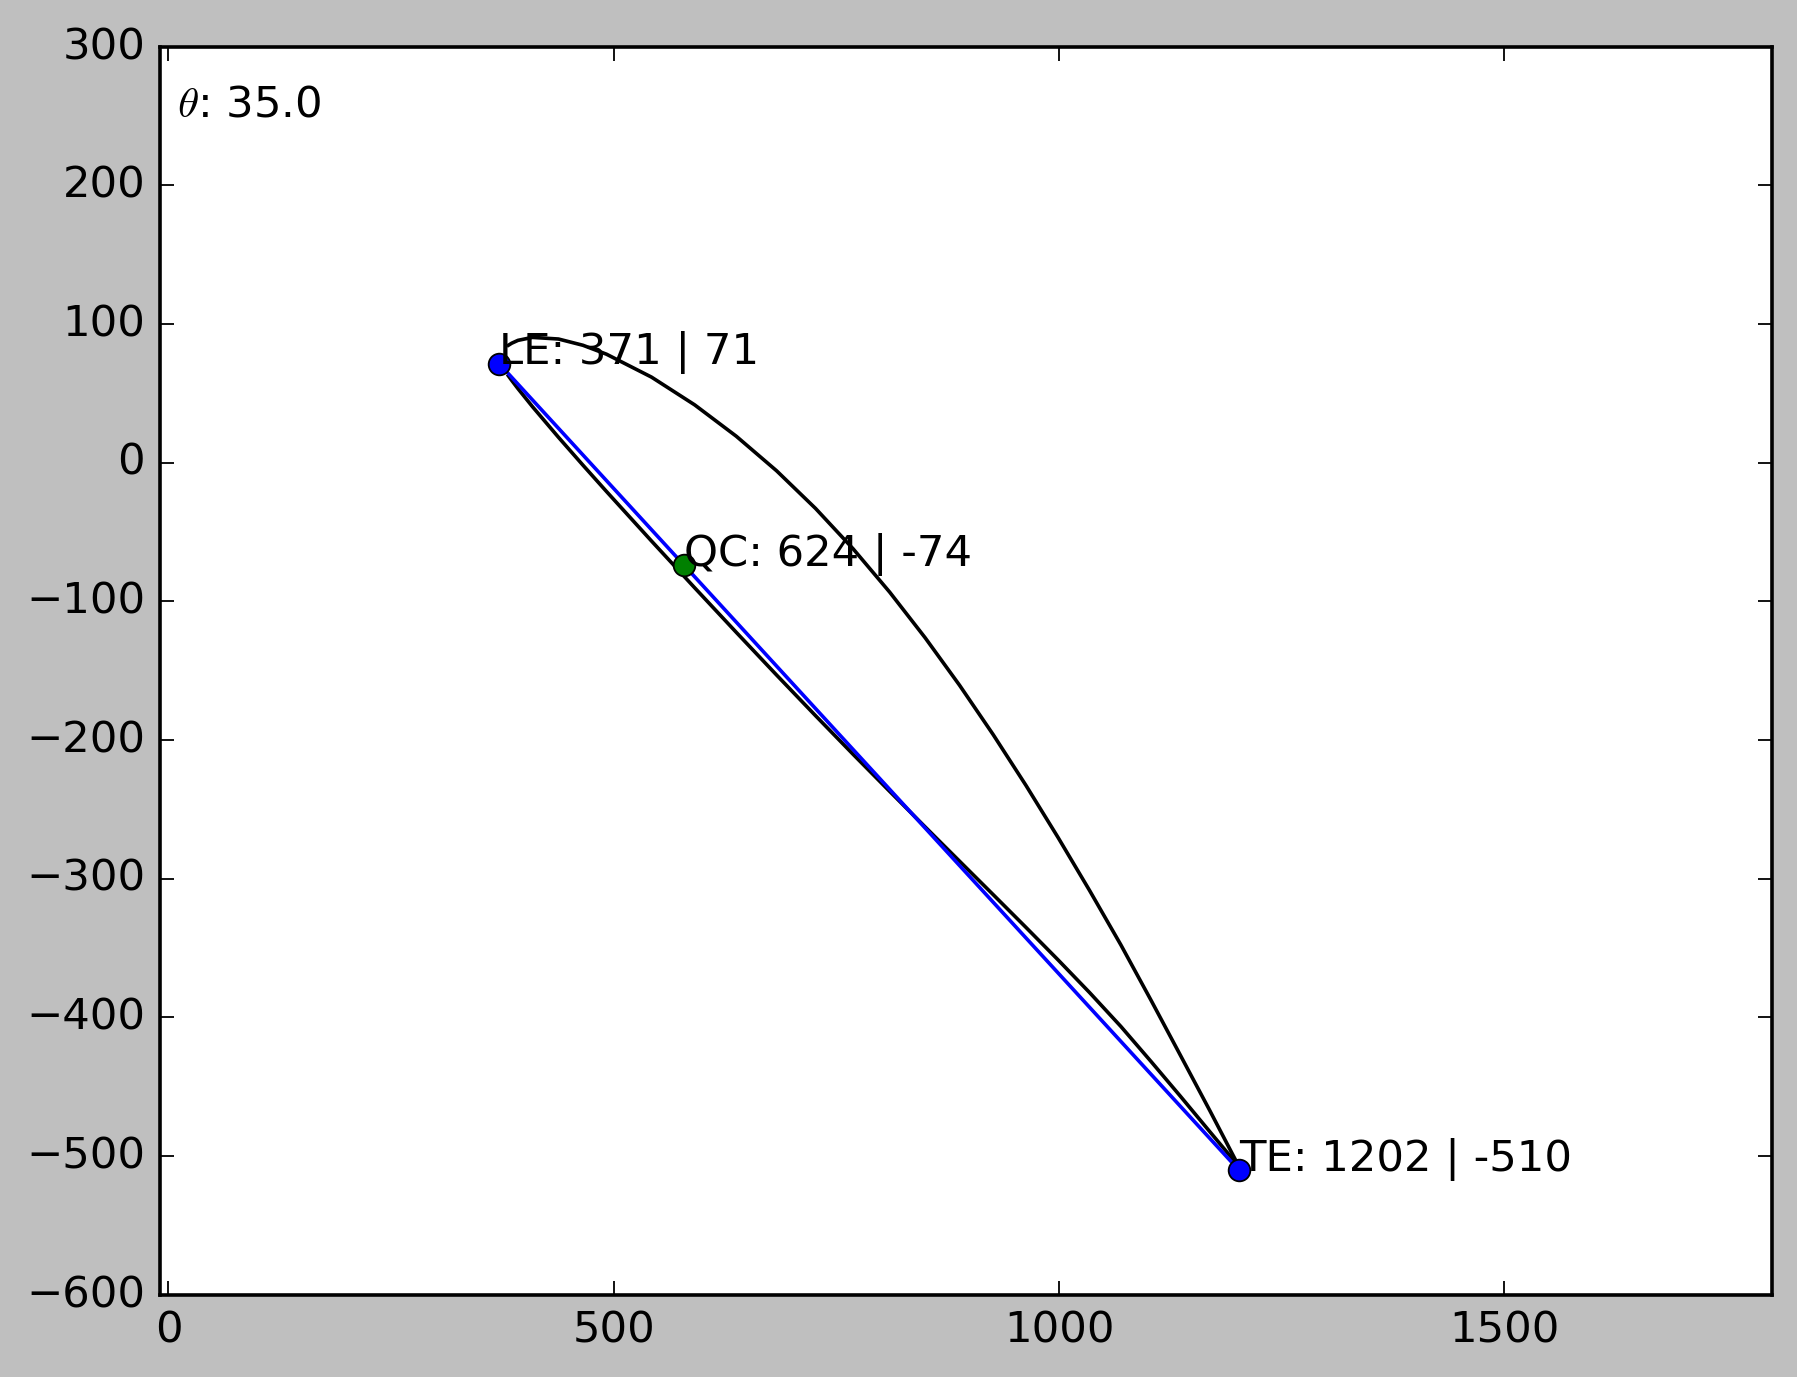

In [7]:
def fullDeployment():
    fig, ax = plt.subplots(dpi=260)

    interval = intervals - 1

    dx = dxList[interval]
    dy = dyList[interval]
    theta = thetaList[interval]

    qcx = QCx(dx, theta)
    qcy = QCy(dy, theta)

    lex = LEx(qcx, theta)
    tex = TEx(qcx, theta)

    ley = LEy(qcy, theta)
    tey = TEy(qcy, theta)

    ax.set(xlim = (-10, 1800), ylim=(-600, 300))
    
    # https://www.science-emergence.com/Articles/How-to-create-and-apply-a-rotation-matrix-using-python-/
    radTheta = np.radians(-theta)
    r = np.array([ [np.cos(radTheta), -np.sin(radTheta)], [np.sin(radTheta),  np.cos(radTheta)] ])
    
    xPrime = []
    y1Prime = []
    y3Prime = []
    
    for i in range(0, len(airfoilNPx)):
        airfoilPrime1 = r.dot(np.array([airfoilNPx[i], airfoilNPy1[i]]))
        airfoilPrime3 = r.dot(np.array([airfoilNPx[i], airfoilNPy3[i]]))
        
        xPrime.append(airfoilPrime1[0] + dx)
        y1Prime.append(airfoilPrime1[1] - dy)
        y3Prime.append(airfoilPrime3[1] - dy)

    plt.plot(xPrime, y1Prime, color='black')
    plt.plot(xPrime, y3Prime, color='black')

    ax.plot([lex, tex], [ley, tey], marker='o')
    ax.plot([qcx], [qcy], marker='o')

    ax.text(qcx, qcy, 'QC: {0} | {1}'.format(int(dx + quarterChord), int(dy)))
    ax.text(lex, ley, 'LE: {0} | {1}'.format(int(lex), int(ley)))
    ax.text(tex, tey, 'TE: {0} | {1}'.format(int(tex), int(tey)))
    ax.text(10, 250, r'$\theta$: {0}'.format(theta))

    plt.show()

fullDeployment()